In [69]:
import torch
import pandas as pd
from flair.data import Sentence
from flair.embeddings import WordEmbeddings, FlairEmbeddings
import matplotlib.pyplot as plt


In [130]:
path = './dataset/Spooky Author Identification/split/total_with_pos.csv'
df = pd.read_csv(path, delimiter=',', index_col= 0, encoding='utf-8') 
text_list = df['text'].values.tolist()
author_list = df['author'].values.tolist()

In [127]:
df.head()

,id,text,author,flair POS,nltk POS,hmm POS,flair raw,nltk raw,hmm raw,flair_freq,nltk_freq,hmm_freq
0,id26305,"This process, however, afforded me no means of...",EAP,"['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...","['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...","['DT', 'JJ', 'NN', 'IN', 'PRP', 'DT', 'NNS', '...","This <DT> process <NN> , <,> however <RB> , <,...","[('This', 'DT'), ('process', 'NN'), (',', ',')...","[('This', 'DT'), ('process,', 'JJ'), ('however...","[0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 1.0, 4.0, 0.0, ...","[0.0, 3.0, 0.0, 2.0, 2.0, 4.0, 1.0, 0.0, 0.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"['PRP', 'RB', 'RB', 'VBD', 'IN', 'PRP', 'IN', ...","['PRP', 'RB', 'RB', 'VBD', 'TO', 'PRP', 'IN', ...","['PRP', 'RB', 'RB', 'VBN', 'IN', 'PRP', 'IN', ...",It <PRP> never <RB> once <RB> occurred <VBD> t...,"[('It', 'PRP'), ('never', 'RB'), ('once', 'RB'...","[('It', 'PRP'), ('never', 'RB'), ('once', 'RB'...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'JJ', ...","['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'JJ', ...","['IN', 'PRP$', 'JJ', 'NN', 'VBD', 'DT', 'NN', ...",In <IN> his <PRP$> left <JJ> hand <NN> was <VB...,"[('In', 'IN'), ('his', 'PRP$'), ('left', 'JJ')...","[('In', 'IN'), ('his', 'PRP$'), ('left', 'JJ')...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 4.0, 4.0, 0.0, 0.0, 0.0, ...","[0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"['WRB', 'JJ', 'VBZ', 'NN', 'IN', 'PRP', 'VBD',...","['WRB', 'RB', 'VBZ', 'JJ', 'IN', 'PRP', 'VBD',...","['WRB', 'JJ', 'VBZ', 'NN', 'IN', 'PRP', 'VBD',...",How <WRB> lovely <JJ> is <VBZ> spring <NN> As ...,"[('How', 'WRB'), ('lovely', 'RB'), ('is', 'VBZ...","[('How', 'WRB'), ('lovely', 'JJ'), ('is', 'VBZ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 6.0, 3.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 5.0, 3.0, 0.0, 0.0, 1.0, ...","[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"['VBG', 'NN', 'RB', ',', 'RB', 'RB', 'NN', ','...","['VBG', 'NN', 'RB', ',', 'RB', 'RB', 'NN', ','...","['VBG', 'NN', 'VBZ', 'RB', 'RB', 'IN', 'DT', '...","Finding <VBG> nothing <NN> else <RB> , <,> not...","[('Finding', 'VBG'), ('nothing', 'NN'), ('else...","[('Finding', 'VBG'), ('nothing', 'NN'), ('else...","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 2.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [119]:
text_list[0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [6]:
glove_embedding = WordEmbeddings('glove')

In [147]:
embeddings_list = []
for text in text_list[:200]:
    sentence = Sentence(text)
    glove_embedding.embed(sentence)
    for j,token in enumerate(sentence):
        if j == 0:
            words_embeddings = torch.reshape(token.embedding.to('cpu'), (1, 100))
        else:
            words_embeddings = torch.cat((words_embeddings, torch.reshape(token.embedding.to('cpu'), (1, 100))))
    embeddings_list.append(words_embeddings)

In [111]:
# https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python/13849249#13849249
def unit_vector(vector):
    return vector / torch.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return torch.acos(torch.clamp(torch.dot(v1_u, v2_u), -1.0, 1.0))

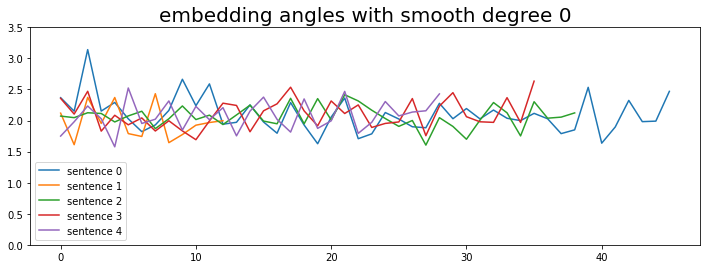

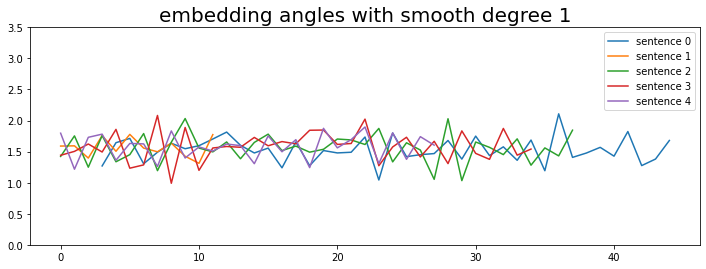

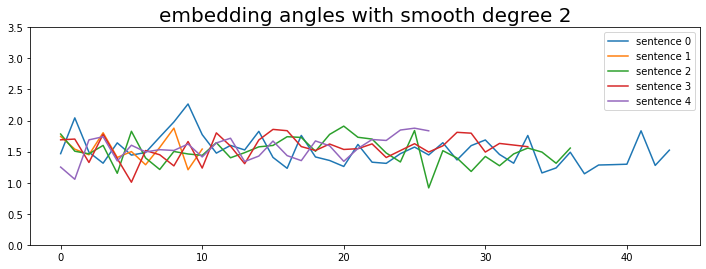

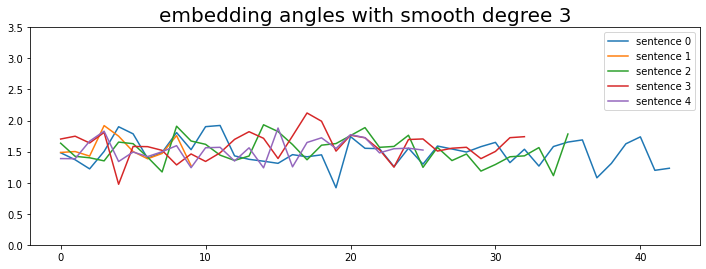

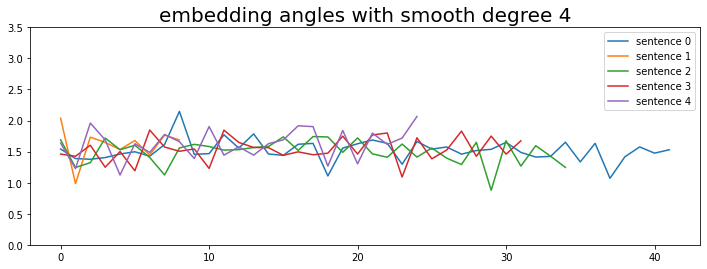

In [157]:
for smooth_degree in range(5):
    plt.figure(figsize=(12,4))
    plt.title('embedding angles with smooth degree {}'.format(smooth_degree), fontsize = 20)
    for j,words_embeddings_sample in enumerate(embeddings_list[:5]):
        averaged_embedding = torch.zeros(words_embeddings_sample.shape[0]-smooth_degree,words_embeddings_sample.shape[1])
        for i in range(words_embeddings_sample.shape[0]-smooth_degree):
            averaged_embedding[i,:] = words_embeddings_sample[i:i+1+smooth_degree,:].mean(axis = 0)

        embedding_direction = torch.zeros(averaged_embedding.shape[0]-1,averaged_embedding.shape[1])
        for i in range(averaged_embedding.shape[0]-1):
            embedding_direction[i,:] = averaged_embedding[i+1,:] - averaged_embedding[i,:]
        angle = torch.zeros(averaged_embedding.shape[0]-2)
        for i in range(averaged_embedding.shape[0]-2):
            angle[i] = angle_between(embedding_direction[i+1,:], embedding_direction[i,:])
        plt.plot(angle, label='sentence {}'.format(j))
        plt.ylim(0,3.5)
    plt.legend()

In [139]:
author_color = {'EAP':'blue', 'HPL':'green', 'MWS':'orange'}

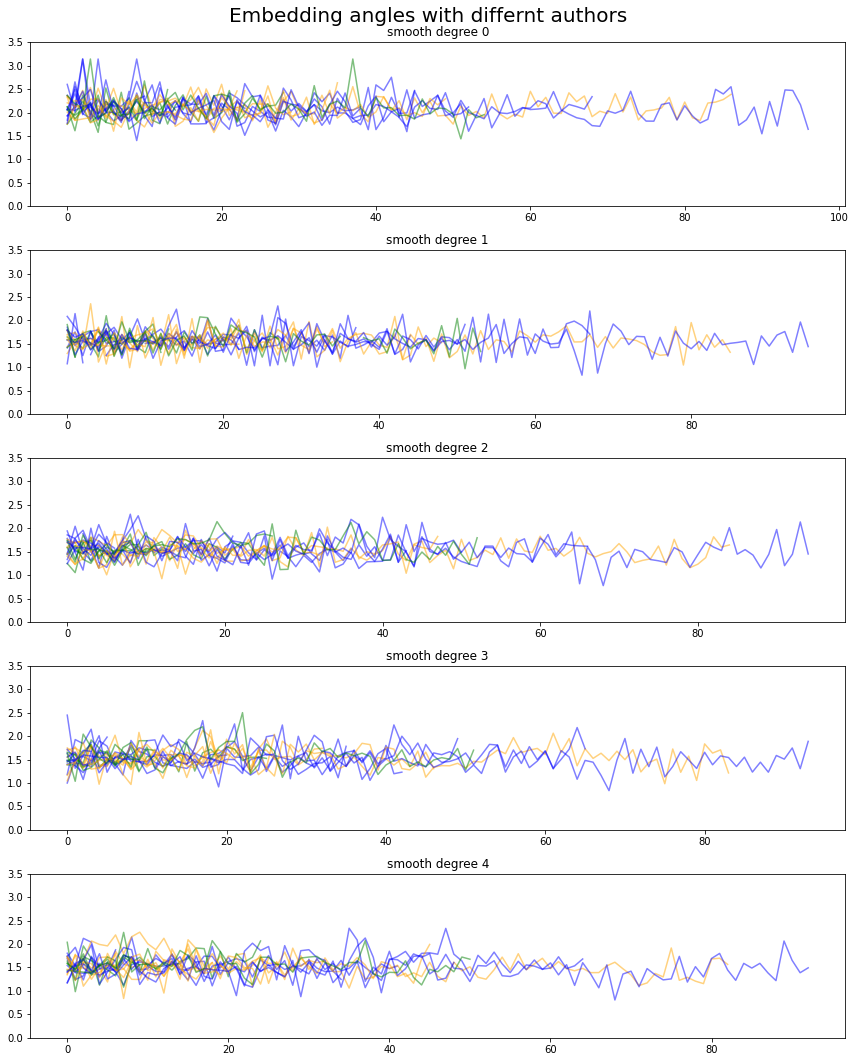

In [185]:
fig = plt.figure(figsize=(12,15))
fig.suptitle('Embedding angles with differnt authors', fontsize=20)

for smooth_degree in range(5):
    plt.subplot(5,1,smooth_degree + 1)
    plt.title('smooth degree {}'.format(smooth_degree))
    for j,words_embeddings_sample in enumerate(embeddings_list[:20]):
        color = author_color[author_list[j]]
        averaged_embedding = torch.zeros(words_embeddings_sample.shape[0]-smooth_degree,words_embeddings_sample.shape[1])
        for i in range(words_embeddings_sample.shape[0]-smooth_degree):
            averaged_embedding[i,:] = words_embeddings_sample[i:i+1+smooth_degree,:].mean(axis = 0)

        embedding_direction = torch.zeros(averaged_embedding.shape[0]-1,averaged_embedding.shape[1])
        for i in range(averaged_embedding.shape[0]-1):
            embedding_direction[i,:] = averaged_embedding[i+1,:] - averaged_embedding[i,:]
        angle = torch.zeros(averaged_embedding.shape[0]-2)
        for i in range(averaged_embedding.shape[0]-2):
            angle[i] = angle_between(embedding_direction[i+1,:], embedding_direction[i,:])
        plt.plot(angle, color = color, alpha = 0.5, label='sentence {}'.format(j))
        plt.ylim(0,3.5)
#     plt.legend()
plt.tight_layout()

In [151]:
df['author'][:50].value_counts()

EAP    21
HPL    18
MWS    11
Name: author, dtype: int64

# Create an artificial paragraph with 3 sentences, one from each author

In [159]:
df.iloc[0]

id                                                      id26305
text          This process, however, afforded me no means of...
author                                                      EAP
flair POS     ['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...
nltk POS      ['DT', 'NN', ',', 'RB', ',', 'VBD', 'PRP', 'DT...
hmm POS       ['DT', 'JJ', 'NN', 'IN', 'PRP', 'DT', 'NNS', '...
flair raw     This <DT> process <NN> , <,> however <RB> , <,...
nltk raw      [('This', 'DT'), ('process', 'NN'), (',', ',')...
hmm raw       [('This', 'DT'), ('process,', 'JJ'), ('however...
flair_freq    [0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 1.0, 4.0, 0.0, ...
nltk_freq     [0.0, 3.0, 0.0, 2.0, 2.0, 4.0, 1.0, 0.0, 0.0, ...
hmm_freq      [0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: 0, dtype: object

In [158]:
df.iloc[10]

id                                                      id16737
text          He shall find that I can feel my injuries; he ...
author                                                      MWS
flair POS     ['PRP', 'MD', 'VB', 'IN', 'PRP', 'MD', 'VB', '...
nltk POS      ['PRP', 'MD', 'VB', 'IN', 'PRP', 'MD', 'VB', '...
hmm POS       ['PRP', 'MD', 'VB', 'IN', 'PRP', 'MD', 'VB', '...
flair raw     He <PRP> shall <MD> find <VB> that <IN> I <PRP...
nltk raw      [('He', 'PRP'), ('shall', 'MD'), ('find', 'VB'...
hmm raw       [('He', 'PRP'), ('shall', 'MD'), ('find', 'VB'...
flair_freq    [0.0, 4.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...
nltk_freq     [0.0, 4.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...
hmm_freq      [0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: 10, dtype: object

In [162]:
df.iloc[21]

id                                                      id08075
text          It was not that the sounds were hideous, for t...
author                                                      HPL
flair POS     ['PRP', 'VBD', 'RB', 'IN', 'DT', 'NNS', 'VBD',...
nltk POS      ['PRP', 'VBD', 'RB', 'IN', 'DT', 'NNS', 'VBD',...
hmm POS       ['PRP', 'VBD', 'RB', 'IN', 'DT', 'NNS', 'VBD',...
flair raw     It <PRP> was <VBD> not <RB> that <IN> the <DT>...
nltk raw      [('It', 'PRP'), ('was', 'VBD'), ('not', 'RB'),...
hmm raw       [('It', 'PRP'), ('was', 'VBD'), ('not', 'RB'),...
flair_freq    [0.0, 5.0, 0.0, 0.0, 0.0, 1.0, 3.0, 2.0, 0.0, ...
nltk_freq     [0.0, 5.0, 0.0, 1.0, 3.0, 2.0, 0.0, 1.0, 0.0, ...
hmm_freq      [0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: 21, dtype: object

In [181]:
print(len(text_list[0].split()), len(text_list[10].split()), len(text_list[21].split()) )

41 22 44


In [170]:
artificial_paragraph = text_list[0] + ' ' + text_list[10] + ' '  + text_list[21]
artificial_paragraph

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall. He shall find that I can feel my injuries; he shall learn to dread my revenge" A few days after he arrived. It was not that the sounds were hideous, for they were not; but that they held vibrations suggesting nothing on this globe of earth, and that at certain intervals they assumed a symphonic quality which I could hardly conceive as produced by one player.'

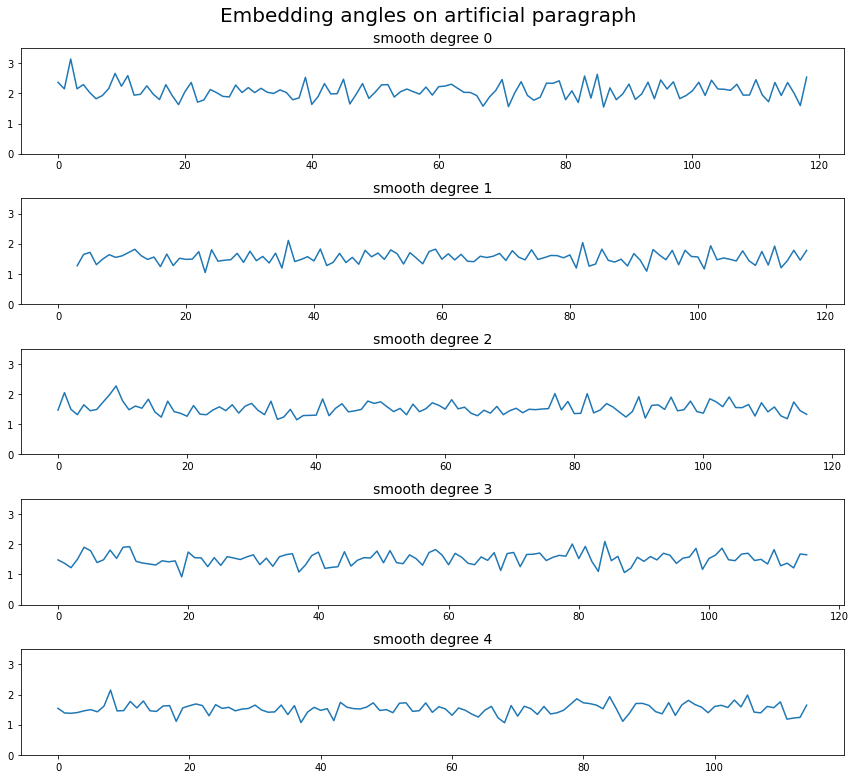

In [180]:

for smooth_degree in range(5):
    
    sentence = Sentence(artificial_paragraph)
    glove_embedding.embed(sentence)
    for j,token in enumerate(sentence):
        if j == 0:
            words_embeddings = torch.reshape(token.embedding.to('cpu'), (1, 100))
        else:
            words_embeddings = torch.cat((words_embeddings, torch.reshape(token.embedding.to('cpu'), (1, 100))))
    words_embeddings_sample = words_embeddings
    plt.subplot(5,1,smooth_degree + 1)
    plt.title('smooth degree {}'.format(smooth_degree), fontsize = 14)
    averaged_embedding = torch.zeros(words_embeddings_sample.shape[0]-smooth_degree,words_embeddings_sample.shape[1])
    for i in range(words_embeddings_sample.shape[0]-smooth_degree):
        averaged_embedding[i,:] = words_embeddings_sample[i:i+1+smooth_degree,:].mean(axis = 0)

    embedding_direction = torch.zeros(averaged_embedding.shape[0]-1,averaged_embedding.shape[1])
    for i in range(averaged_embedding.shape[0]-1):
        embedding_direction[i,:] = averaged_embedding[i+1,:] - averaged_embedding[i,:]
    angle = torch.zeros(averaged_embedding.shape[0]-2)
    for i in range(averaged_embedding.shape[0]-2):
        angle[i] = angle_between(embedding_direction[i+1,:], embedding_direction[i,:])
    plt.plot(angle)
    plt.ylim(0,3.5)
plt.tight_layout()